# Investment Value

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

## Create a DataFrame with the current amount of shares

In [2]:
# Set current amount of shares data
# YOUR CODE HERE!
shares_data = {'Shares': [200, 320]}

In [3]:
# Set the tickers
tickers = ['MSFT', 'AAPL']

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index = tickers)

# Display shares data
df_shares

,Shares
MSFT,200
AAPL,320


In [4]:
# Load .env environment variables
load_dotenv('my_keys.env')

True

In [5]:
# Set Alpaca API key and secret
api_key = os.getenv("Alpace_API_Key")
api_secret_key = os.getenv("Alpaca_API_Secret_Key")

In [6]:
# Verify that Alpaca key and secret were correctly loaded
type(api_key)
type(api_secret_key)

str

In [7]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    api_key,
    api_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

In [9]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [10]:
# Get current price data for MSFT and AAPL
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

AAPL                                      MSFT  \
                             open    high     low   close    volume    open   
time                                                                          
2020-07-14 00:00:00-04:00  379.36  389.02  375.51  388.21  37043531  206.13   

                                                             
                             high     low   close    volume  
time                                                         
2020-07-14 00:00:00-04:00  208.85  202.03  208.39  33022403

## Calculate the current value in dollars of the stock portfolio

In [11]:
# Fetch the current closing prices from the DataFrame
msft_price = float(df_portfolio["MSFT"]["close"])
aapl_price = float(df_portfolio["AAPL"]["close"])
aapl_price

388.21

In [12]:
# Compute the current value in dollars of the stock portfolio
msft_value = msft_price*df_shares.loc['MSFT', 'Shares']
aapl_value = aapl_price*df_shares.loc['AAPL', 'Shares']

# Print the current value of the stocks portfolio
print(aapl_value)
print(msft_value)

124227.2
41678.0


## Plot stock portfolio composition

### Create a DataFrame with the current value of shares

In [16]:
# Set the data for the shares value DataFrame
value_data = {'MSFT':[msft_value], 'AAPL':[aapl_value]}

# Create a DataFrame with the current value of shares
df_value = pd.DataFrame(value_data)

# Display DataFrame data
df_value

,MSFT,AAPL
0,41678.0,124227.2


<AxesSubplot:ylabel='Shares'>

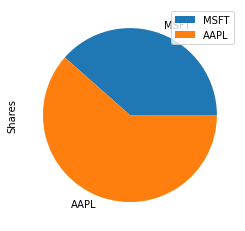

In [22]:
# Create a pie chart to show the proportion of stocks in the portfolio
df_shares.plot.pie(y='Shares')

<AxesSubplot:>

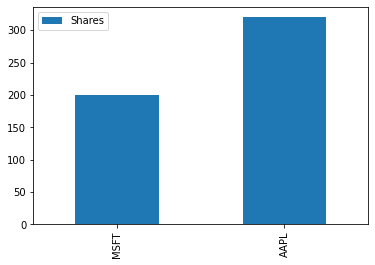

In [23]:
# Create a bar plot to show the value of shares
df_shares.plot.bar()